In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
ds = pd.read_csv('Ads_CTR_Optimisation.csv')
ds.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [2]:
# total number of ads
d = 10
# number of times the ad i got reward 1
number_of_rewards_1 = [0] * d
# number of times the ad i got reward 0
number_of_rewards_0 = [0] * d
# total number of rounds
N = 10000
# the ads algorithm will select
ads_selected = []
# total reward
total_reward = 0
# number of times the ad i was selected
numbers_of_selection = [0] * d
# for all rounds
for n in range(0, N):
    max_random = 0
    ad = 0
    # for all ads
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i] + 1,
                                        number_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = ds.values[n, ad]
    total_reward += reward
    if reward == 1:
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    numbers_of_selection[ad] = numbers_of_selection[ad] + 1


In [3]:
total_reward

np.int64(2595)

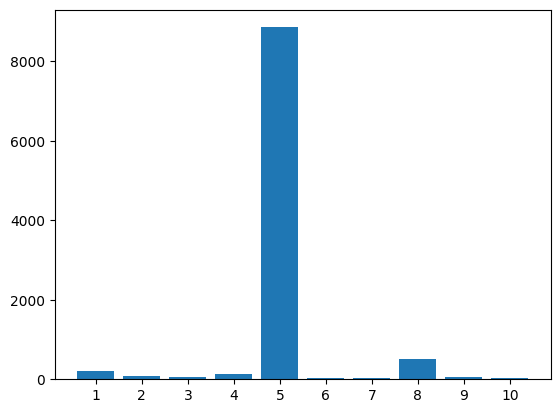

In [4]:
plt.bar(range(1, 11), numbers_of_selection, align="center")
plt.xticks(range(1, 11))
plt.show()

In [5]:
numbers_of_selection

[214, 75, 63, 123, 8855, 25, 40, 517, 63, 25]